### 2.1 Write a program to generate the state 1/√2 * (|01⟩+|10⟩)

In [ ]:
from qiskit import *
%matplotlib inline

In [10]:
qc = QuantumCircuit(2, 2)

In [11]:
qc.h(1);

In [12]:
qc.cx(0, 1);

In [13]:
qc.cx(1,0);

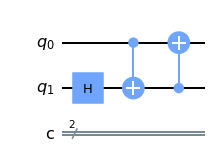

In [14]:
qc.draw(output = "mpl")

In [18]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(1, 4)
state = state.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

### 2.2 Generate The Density Matrix for the above state

In [21]:
import qiskit.quantum_info as qi

In [24]:
rho_AB = qi.DensityMatrix.from_instruction(qc)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

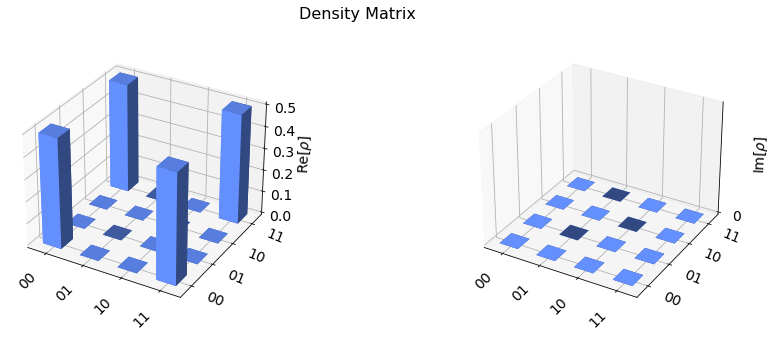

In [27]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

### 2.4 Decomposition of Swap Gate into CNOT gate

In [38]:
#qc_new = QuantumCircuit(2)
#qc_new.swap(0,1)
#qc_new.draw(output = "mpl")

In [39]:
#rho_AB = qi.DensityMatrix.from_instruction(qc_new)
#rho_AB.draw('latex', prefix='\\rho_{AB} = ')
#Statevector(qc).draw('city')

In [42]:
#qc_c = QuantumCircuit(2)

#qc_c.cx(0,1)
#qc_c.cx(1,0)
#qc_c.cx(0,1)
#qc_c.draw(output = "mpl")

In [41]:
#rho_AB = qi.DensityMatrix.from_instruction(qc_c)
#rho_AB.draw('latex', prefix='\\rho_{AB} = ')
#Statevector(qc).draw('city')

### 2.5

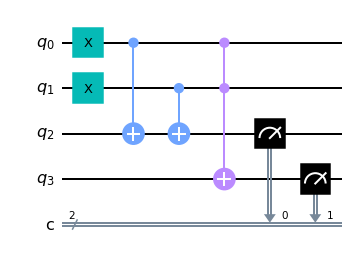

In [28]:
new_qc = QuantumCircuit(4,2)
new_qc.x(0)
new_qc.x(1)

new_qc.cx(0,2)
new_qc.cx(1,2)

new_qc.ccx(0,1,3)

new_qc.measure(2,0)
new_qc.measure(3,1)

new_qc.draw(output='mpl')